#CREDIT SCORE HOME CREDIT INDONESIA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/home-credit-default-risk/application_train.csv')
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # hitung persentase target=1 berdasarkan masing-masing column
    cat_perc = train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)

    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1, palette="Set2")

    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)

    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc, palette="Set2")

    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

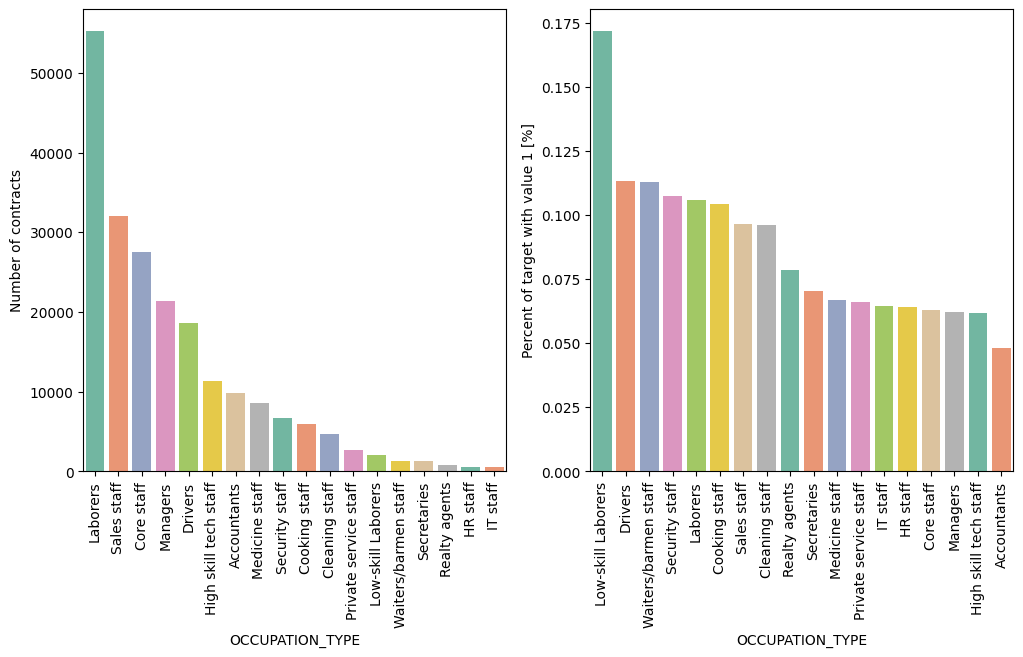

In [ ]:
# kemampuan kredit berdasarkan pekerjaan
plot_stats('OCCUPATION_TYPE',True, True)

from the results it is known:
- the majority of people who apply for loans are laborers
- when viewed from the ability to repay loans, people with low skill laborers' employment status have a higher default rate than others.

Text(0.5, 1.0, 'distribution of age')

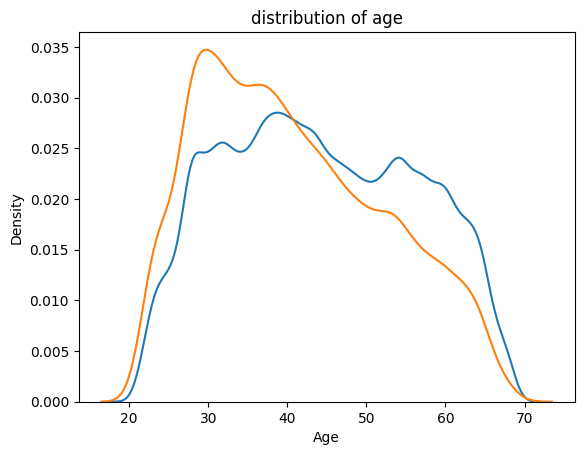

In [ ]:
sns.kdeplot(train.loc[train['TARGET']==0, 'DAYS_BIRTH'].abs()/365, label='target == 0')
sns.kdeplot(train.loc[train['TARGET']==1,'DAYS_BIRTH'].abs()/365, label='target == 1')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('distribution of age')

The results show that younger people are less likely to repay their loans.

### Actually, I did the data visualization in the second python file, but because the data has been preprocessed, the numerical results for the work are numbers because they have been encoded. So I visualize it here because it is to see the occupation type in the form of objects.

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/home-credit-default-risk/application_test.csv')
test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
bureau = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/home-credit-default-risk/bureau.csv')
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [ ]:
bureau_blc = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/home-credit-default-risk/bureau_balance.csv')
bureau_blc.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [ ]:
prev_app = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/home-credit-default-risk/previous_application.csv')
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pos_cash_blc = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/home-credit-default-risk/POS_CASH_balance.csv')
pos_cash_blc.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [ ]:
install_pay = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/home-credit-default-risk/installments_payments.csv')
install_pay.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [ ]:
credit_card_blc = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/home-credit-default-risk/credit_card_balance.csv')
credit_card_blc.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


LABEL ENCODER

In [ ]:
label = LabelEncoder()

TRAIN & TEST

In [ ]:
for col in train.columns[train.dtypes == 'object']:
    col_train = set(train[col].unique())
    col_test = set(test[col].unique())
    min_col = col_train - col_test
    if len(min_col) > 0:
        print('feature ' + col + ' has different values: ', min_col)

feature CODE_GENDER has different values:  {'XNA'}
feature NAME_INCOME_TYPE has different values:  {'Maternity leave'}
feature NAME_FAMILY_STATUS has different values:  {'Unknown'}


In [ ]:
train['CODE_GENDER'] = np.where(train['CODE_GENDER'] == 'XNA', np.nan, train['CODE_GENDER'])
train['NAME_INCOME_TYPE'] = np.where(train['NAME_INCOME_TYPE'] == 'Maternity leave', np.nan, train['NAME_INCOME_TYPE'])
train['NAME_FAMILY_STATUS'] = np.where(train['NAME_FAMILY_STATUS'] == 'Unknown', np.nan, train['NAME_FAMILY_STATUS'])

In [ ]:
for col in train.columns[train.dtypes=='object']:
    train[col] = label.fit_transform(train[col])

In [ ]:
train.shape

(307511, 122)

In [ ]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
for col in test.columns[test.dtypes=='object']:
    test[col] = label.fit_transform(test[col])

In [ ]:
test.shape

(48744, 121)

In [ ]:
test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


bureau & bureau_balance

In [ ]:
for col in bureau.columns[bureau.dtypes=='object']:
    bureau[col] = label.fit_transform(bureau[col])

In [ ]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,2,0,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,3,-131,NaN
1,215354,5714463,0,0,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,4,-20,NaN
2,215354,5714464,0,0,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,3,-16,NaN
3,215354,5714465,0,0,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,4,-16,NaN
4,215354,5714466,0,0,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,3,-21,NaN


In [ ]:
bureau_blc.STATUS.value_counts()

STATUS
C    13646993
0     7499507
X     5810482
1      242347
5       62406
2       23419
3        8924
4        5847
Name: count, dtype: int64

In [ ]:
bureau_blc = pd.get_dummies(bureau_blc, columns=['STATUS'], prefix='STATUS_')
bureau_blc.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS__0,STATUS__1,STATUS__2,STATUS__3,STATUS__4,STATUS__5,STATUS__C,STATUS__X
0,5715448,0,False,False,False,False,False,False,True,False
1,5715448,-1,False,False,False,False,False,False,True,False
2,5715448,-2,False,False,False,False,False,False,True,False
3,5715448,-3,False,False,False,False,False,False,True,False
4,5715448,-4,False,False,False,False,False,False,True,False


In [ ]:
for col in bureau_blc.columns[bureau_blc.dtypes=='bool']:
    bureau_blc[col] = label.fit_transform(bureau_blc[col])

In [ ]:
bureau_blc.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS__0,STATUS__1,STATUS__2,STATUS__3,STATUS__4,STATUS__5,STATUS__C,STATUS__X
0,5715448,0,0,0,0,0,0,0,1,0
1,5715448,-1,0,0,0,0,0,0,1,0
2,5715448,-2,0,0,0,0,0,0,1,0
3,5715448,-3,0,0,0,0,0,0,1,0
4,5715448,-4,0,0,0,0,0,0,1,0


In [ ]:
bureau.shape

(1716428, 17)

In [ ]:
bureau_blc.shape

(27299925, 10)

previous_app, POSH_CASH_balance, credit_card_balance, instal_payment

In [ ]:
for col in prev_app.columns[prev_app.dtypes=='object']:
    prev_app[col] = label.fit_transform(prev_app[col])

In [ ]:
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,1,1730.430,17145.0,17145.0,0.0,17145.0,2,15,...,2,12.0,4,13,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,0,25188.615,607500.0,679671.0,NaN,607500.0,4,11,...,10,36.0,2,7,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,0,15060.735,112500.0,136444.5,NaN,112500.0,5,11,...,10,12.0,1,6,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,0,47041.335,450000.0,470790.0,NaN,450000.0,1,7,...,10,12.0,4,8,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,0,31924.395,337500.0,404055.0,NaN,337500.0,4,9,...,10,24.0,1,3,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
prev_app.shape

(1670214, 37)

In [ ]:
for col in pos_cash_blc.columns[pos_cash_blc.dtypes=='object']:
    pos_cash_blc[col] = label.fit_transform(pos_cash_blc[col])

In [ ]:
pos_cash_blc.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,0,0,0
1,1715348,367990,-33,36.0,35.0,0,0,0
2,1784872,397406,-32,12.0,9.0,0,0,0
3,1903291,269225,-35,48.0,42.0,0,0,0
4,2341044,334279,-35,36.0,35.0,0,0,0


In [ ]:
pos_cash_blc.shape

(10001358, 8)

In [ ]:
for col in credit_card_blc.columns[credit_card_blc.dtypes=='object']:
    credit_card_blc[col] = label.fit_transform(credit_card_blc[col])

In [ ]:
credit_card_blc.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,0,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,0,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,0,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,0,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,0,0,0


In [ ]:
credit_card_blc.shape

(3840312, 23)

In [ ]:
install_pay.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [ ]:
install_pay.shape

(13605401, 8)

##CLEANING DATA
Missing Values \
Removal of null column only in column with a percentage of 70% over

train & test

In [ ]:
## function for looking precentage of missing values in df
def miss_precent(df):
    result = (df.isnull().sum().sum() / df.size) * 100
    return result

#function for looking precentage of missing values in columns
def in_col(df):
    percent = df.isnull().sum() / len(df)
    result_df = pd.DataFrame({'column_index': percent.index, 'percentage': percent.values})
    result_df = result_df.sort_values(by='percentage', ascending=False)

    return result_df

In [ ]:
miss_precent(train)

22.358507127373986

In [ ]:
train_miss = in_col(train)
train_miss

,column_index,percentage
48,COMMONAREA_AVG,0.698723
76,COMMONAREA_MEDI,0.698723
62,COMMONAREA_MODE,0.698723
70,NONLIVINGAPARTMENTS_MODE,0.694330
56,NONLIVINGAPARTMENTS_AVG,0.694330
...,...,...
12,NAME_INCOME_TYPE,0.000000
11,NAME_TYPE_SUITE,0.000000
8,AMT_CREDIT,0.000000
86,FONDKAPREMONT_MODE,0.000000


In [ ]:
miss_precent(test)

21.793485411385234

In [ ]:
test_miss = in_col(test)
test_miss

,column_index,percentage
75,COMMONAREA_MEDI,0.687161
61,COMMONAREA_MODE,0.687161
47,COMMONAREA_AVG,0.687161
55,NONLIVINGAPARTMENTS_AVG,0.684125
69,NONLIVINGAPARTMENTS_MODE,0.684125
...,...,...
12,NAME_EDUCATION_TYPE,0.000000
11,NAME_INCOME_TYPE,0.000000
10,NAME_TYPE_SUITE,0.000000
9,AMT_GOODS_PRICE,0.000000


bureau & bureau_balance

In [ ]:
miss_precent(bureau)

13.502552290879322

In [ ]:
bureau_miss = in_col(bureau)
bureau_miss

,column_index,percentage
16,AMT_ANNUITY,0.714735
8,AMT_CREDIT_MAX_OVERDUE,0.655133
7,DAYS_ENDDATE_FACT,0.369170
12,AMT_CREDIT_SUM_LIMIT,0.344774
11,AMT_CREDIT_SUM_DEBT,0.150119
6,DAYS_CREDIT_ENDDATE,0.061496
10,AMT_CREDIT_SUM,0.000008
2,CREDIT_ACTIVE,0.000000
3,CREDIT_CURRENCY,0.000000
4,DAYS_CREDIT,0.000000


In [ ]:
bureau_miss.column_index[bureau_miss.percentage > 0.7].to_list()

['AMT_ANNUITY']

In [ ]:
bureau.drop(columns=bureau_miss.column_index[bureau_miss.percentage > 0.7].to_list(), inplace=True)
bureau.shape

(1716428, 16)

In [ ]:
miss_precent(bureau_blc)

0.0

In [ ]:
bureau_blc_miss = in_col(bureau_blc)
bureau_blc_miss

,column_index,percentage
0,SK_ID_BUREAU,0.0
1,MONTHS_BALANCE,0.0
2,STATUS__0,0.0
3,STATUS__1,0.0
4,STATUS__2,0.0
5,STATUS__3,0.0
6,STATUS__4,0.0
7,STATUS__5,0.0
8,STATUS__C,0.0
9,STATUS__X,0.0


previous_app, POSH_CASH_balance, credit_card_balance, instal_payment

In [ ]:
miss_precent(prev_app)

16.64875667817806

In [ ]:
prev_miss = in_col(prev_app)
prev_miss.head()

,column_index,percentage
14,RATE_INTEREST_PRIVILEGED,0.996437
13,RATE_INTEREST_PRIMARY,0.996437
12,RATE_DOWN_PAYMENT,0.536365
6,AMT_DOWN_PAYMENT,0.536365
36,NFLAG_INSURED_ON_APPROVAL,0.402981


In [ ]:
prev_miss.column_index[prev_miss.percentage > 0.7].to_list()

['RATE_INTEREST_PRIVILEGED', 'RATE_INTEREST_PRIMARY']

In [ ]:
prev_app.drop(columns=prev_miss.column_index[prev_miss.percentage > 0.7].to_list(), inplace=True)
prev_app.shape

(1670214, 35)

In [ ]:
miss_precent(pos_cash_blc)

0.06518864738168557

In [ ]:
pos_miss = in_col(pos_cash_blc)
pos_miss.head()

,column_index,percentage
4,CNT_INSTALMENT_FUTURE,0.002608
3,CNT_INSTALMENT,0.002607
0,SK_ID_PREV,0.000000
1,SK_ID_CURR,0.000000
2,MONTHS_BALANCE,0.000000


In [ ]:
miss_precent(install_pay)

0.005337953655316738

In [ ]:
inst_pay_miss = in_col(install_pay)
inst_pay_miss.head()

,column_index,percentage
5,DAYS_ENTRY_PAYMENT,0.000214
7,AMT_PAYMENT,0.000214
0,SK_ID_PREV,0.000000
1,SK_ID_CURR,0.000000
2,NUM_INSTALMENT_VERSION,0.000000


In [ ]:
miss_precent(credit_card_blc)

6.654074392687479

In [ ]:
credit_miss = in_col(credit_card_blc)
credit_miss.head()

,column_index,percentage
10,AMT_PAYMENT_CURRENT,0.199981
5,AMT_DRAWINGS_ATM_CURRENT,0.195249
18,CNT_DRAWINGS_POS_CURRENT,0.195249
7,AMT_DRAWINGS_OTHER_CURRENT,0.195249
8,AMT_DRAWINGS_POS_CURRENT,0.195249


##MERGE DATA

In [ ]:
def minimize_mem(df):

    initial_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe: {:.2f} MB'.format(initial_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    final_mem = df.memory_usage().sum() / 1024**2

    print('After optimization: {:.2f} MB'.format(final_mem))

    return df.head()

bureau & bureau_balance merged

In [ ]:
minimize_mem(bureau)

Memory usage of dataframe: 209.53 MB
After optimization: 72.02 MB


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE
0,215354,5714462,2,0,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,3,-131
1,215354,5714463,0,0,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,4,-20
2,215354,5714464,0,0,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,3,-16
3,215354,5714465,0,0,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,4,-16
4,215354,5714466,0,0,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,3,-21


In [ ]:
minimize_mem(bureau_blc)

Memory usage of dataframe: 2082.82 MB
After optimization: 338.46 MB


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS__0,STATUS__1,STATUS__2,STATUS__3,STATUS__4,STATUS__5,STATUS__C,STATUS__X
0,5715448,0,0,0,0,0,0,0,1,0
1,5715448,-1,0,0,0,0,0,0,1,0
2,5715448,-2,0,0,0,0,0,0,1,0
3,5715448,-3,0,0,0,0,0,0,1,0
4,5715448,-4,0,0,0,0,0,0,1,0


In [ ]:
merge = bureau_blc.groupby('SK_ID_BUREAU').mean()
for col in merge.columns:
    bureau['Blc_' + col] = bureau['SK_ID_BUREAU'].map(merge[col]).where(bureau['SK_ID_BUREAU'].isin(merge.index))

In [ ]:
bureau.shape
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,...,DAYS_CREDIT_UPDATE,Blc_MONTHS_BALANCE,Blc_STATUS__0,Blc_STATUS__1,Blc_STATUS__2,Blc_STATUS__3,Blc_STATUS__4,Blc_STATUS__5,Blc_STATUS__C,Blc_STATUS__X
0,215354,5714462,2,0,-497,0,-153.0,-153.0,NaN,0,...,-131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,215354,5714463,0,0,-208,0,1075.0,NaN,NaN,0,...,-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,215354,5714464,0,0,-203,0,528.0,NaN,NaN,0,...,-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,215354,5714465,0,0,-203,0,NaN,NaN,NaN,0,...,-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,215354,5714466,0,0,-629,0,1197.0,NaN,77674.5,0,...,-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


previous_app <= POSH_CASH_balance, credit_card_balance, instal_payment

In [ ]:
minimize_mem(prev_app)

Memory usage of dataframe: 446.00 MB
After optimization: 124.24 MB


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,1,1730.430054,17145.0,17145.0,0.0,17145.0,2,15,...,2,12.0,4,13,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,0,25188.615234,607500.0,679671.0,NaN,607500.0,4,11,...,10,36.0,2,7,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,0,15060.735352,112500.0,136444.5,NaN,112500.0,5,11,...,10,12.0,1,6,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,0,47041.335938,450000.0,470790.0,NaN,450000.0,1,7,...,10,12.0,4,8,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,0,31924.394531,337500.0,404055.0,NaN,337500.0,4,9,...,10,24.0,1,3,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
minimize_mem(pos_cash_blc)

Memory usage of dataframe: 610.43 MB
After optimization: 171.68 MB


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,0,0,0
1,1715348,367990,-33,36.0,35.0,0,0,0
2,1784872,397406,-32,12.0,9.0,0,0,0
3,1903291,269225,-35,48.0,42.0,0,0,0
4,2341044,334279,-35,36.0,35.0,0,0,0


In [ ]:
minimize_mem(install_pay)

Memory usage of dataframe: 830.41 MB
After optimization: 311.40 MB


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.359863,6948.359863
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525024,1716.525024
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000000,25425.000000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130859,24350.130859
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040039,2160.584961


In [ ]:
minimize_mem(credit_card_blc)

Memory usage of dataframe: 673.88 MB
After optimization: 263.69 MB


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970001,135000,0.0,877.5,0.0,877.5,1700.324951,...,0.000000,0.000000,0.0,1,0.0,1.0,35.0,0,0,0
1,2582071,363914,-1,63975.554688,45000,2250.0,2250.0,0.0,0.0,2250.000000,...,64875.554688,64875.554688,1.0,1,0.0,0.0,69.0,0,0,0
2,1740877,371185,-7,31815.224609,450000,0.0,0.0,0.0,0.0,2250.000000,...,31460.085938,31460.085938,0.0,0,0.0,0.0,30.0,0,0,0
3,1389973,337855,-4,236572.109375,225000,2250.0,2250.0,0.0,0.0,11795.759766,...,233048.968750,233048.968750,1.0,1,0.0,0.0,10.0,0,0,0
4,1891521,126868,-1,453919.468750,450000,0.0,11547.0,0.0,11547.0,22924.890625,...,453919.468750,453919.468750,0.0,1,0.0,1.0,101.0,0,0,0


In [ ]:
prev_app.shape

(1670214, 35)

In [ ]:
pos_cash_blc.shape

(10001358, 8)

In [ ]:
install_pay.shape

(13605401, 8)

In [ ]:
credit_card_blc.shape

(3840312, 23)

In [ ]:
merge = pos_cash_blc.groupby('SK_ID_PREV').mean()
for col in merge.columns:
    prev_app['POS_' + col] = prev_app['SK_ID_PREV'].map(merge[col]).where(prev_app['SK_ID_PREV'].isin(merge.index))

In [ ]:
prev_app.shape

(1670214, 42)

In [ ]:
merge = install_pay.groupby('SK_ID_PREV').mean()
for col in merge.columns:
    prev_app['INST_' + col] = prev_app['SK_ID_PREV'].map(merge[col]).where(prev_app['SK_ID_PREV'].isin(merge.index))

In [ ]:
prev_app.shape

(1670214, 49)

In [ ]:
merge = credit_card_blc.groupby('SK_ID_PREV').mean()
for col in merge.columns:
    prev_app['CRE_' + col] = prev_app['SK_ID_PREV'].map(merge[col]).where(prev_app['SK_ID_PREV'].isin(merge.index))

In [ ]:
prev_app.shape

(1670214, 71)

Merging bureau, prev_app ==> train/test.

In [ ]:
minimize_mem(train)

Memory usage of dataframe: 286.23 MB
After optimization: 59.53 MB


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
minimize_mem(test)

Memory usage of dataframe: 45.00 MB
After optimization: 9.39 MB


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train.shape

(307511, 122)

In [ ]:
test.shape

(48744, 121)

In [ ]:
bureau.shape

(1716428, 25)

In [ ]:
prev_app.shape

(1670214, 71)

In [ ]:
merge = bureau.groupby('SK_ID_CURR').mean()
for col in merge.columns:
    train['BURE_' + col] = train['SK_ID_CURR'].map(merge[col]).where(train['SK_ID_CURR'].isin(merge.index))
    test['BURE_' + col] = test['SK_ID_CURR'].map(merge[col]).where(test['SK_ID_CURR'].isin(merge.index))

In [ ]:
train.shape

(307511, 146)

In [ ]:
test.shape

(48744, 145)

In [ ]:
merge = prev_app.groupby('SK_ID_CURR').mean()
for col in merge.columns:
    train['PREV_' + col] = train['SK_ID_CURR'].map(merge[col]).where(train['SK_ID_CURR'].isin(merge.index))
    test['PREV_' + col] = test['SK_ID_CURR'].map(merge[col]).where(test['SK_ID_CURR'].isin(merge.index))

In [ ]:
train.shape

(307511, 216)

In [ ]:
test.shape

(48744, 215)

In [ ]:
train.to_csv('train_merge.csv', index=False)
test.to_csv('test_merge.csv', index=False)